In [1]:
import numpy as np
import pylab as p
from matplotlib import animation           
from IPython.display import display, Image
from IPython.display import HTML
from numba import jit
def init():
    line.set_data([], [])                     
    return line,

def animate(i):
    line.set_data(x, MA[i])
    return line,

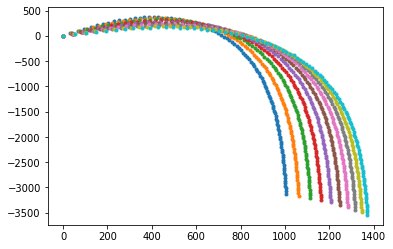

In [2]:
def vec_kuta4(t,x0):
    N = len(t)
    h = (t[-1]-t[0])/N
    x = np.zeros( (N,len(x0) ),float)
    x[0] = np.copy(x0)
    for i in range(N-1):
        k1 = np.copy(h*f(x[i],t[i]))
        k2 = np.copy(h*f(x[i] + k1/2,t[i] + h/2))
        k3 = np.copy(h*f(x[i] + k2/2,t[i] + h/2)) 
        k4 = np.copy(h*f(x[i] + k3,t[i] + h))
        x[i+1]= np.copy(x[i] + (k1 + 2*k2 + 2*k3 + k4)/6)
    return x

def f(r,t):
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    f1 = vx
    f2 = vy
    f3 = -0.5*c*A*rho*np.sqrt(vx**2+vy**2)*vx
    f4 = -0.5*c*A*rho*np.sqrt(vx**2+vy**2)*vy - g
    return np.array([f1,f2,f3,f4],float)

c = 0.15
A = 0.01
rho = 1.225
v = 128
g = 9.81
for theta in np.linspace(1,np.pi/2-1,10):
    x0 = np.array([0,0,v*np.cos(theta),v*np.sin(theta)],float)
    t = np.linspace(0.1,50,100)
    x = vec_kuta4(t,x0)
    p.plot(x[:,0],x[:,1],'.')

p.show()

## Alínea 2

A dependêcia do erro em $h$ é de $h^5$. Visto que o erro é cumulativo, 


## Alínea 3

In [3]:
@jit
def vec_alcance(h,x0):
    x = np.zeros( (1000000,len(x0) ),float)
    x[0] = np.copy(x0)
    i = -1
    t = 0
    y = 1
    while y>0.:
        i += 1
        k1 = np.copy(h*f(x[i],t))
        k2 = np.copy(h*f(x[i] + k1/2,t + h/2))
        k3 = np.copy(h*f(x[i] + k2/2,t + h/2)) 
        k4 = np.copy(h*f(x[i] + k3,t + h))
        x[i+1]= np.copy(x[i] + (k1 + 2*k2 + 2*k3 + k4)/6)
        y = x[i+1][1]
        t += h
    return x[i][0]

    

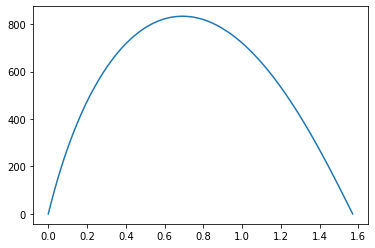

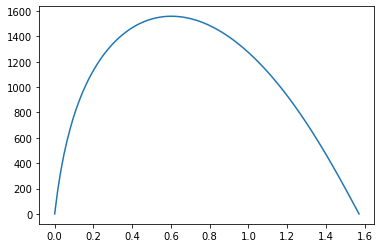

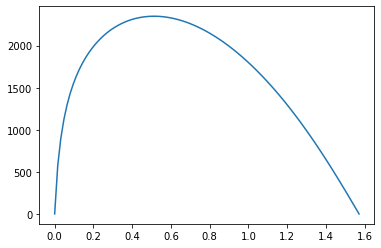

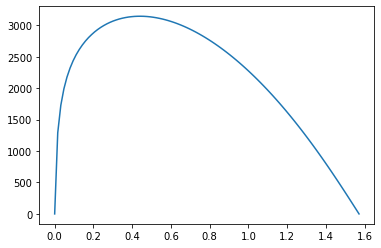

In [4]:
for v in [128,256,512,1024]:                                             #esta célula pode demorar algum tempo
    theta = np.linspace(0,np.pi/2,100)
    alc = np.zeros(len(theta),float)

    for j in range(len(theta)):
        x0 = np.array([0,0,v*np.cos(theta[j]),v*np.sin(theta[j])],float)
        alc[j] = vec_alcance(0.01,x0)
    p.plot(theta,alc)
    p.show()

Podemos ver pelos gráficos que nem todos os valores de $\theta$ têm um outro valor para o qual o alcance é o mesmo. EM particular, à medida que se aumenta a velocidade, a força de arrasto torna-se maior, o que resulta que a partícula tenha cada vez menos velocidade no eixo do x. 

## Alínea 4

3000.05
1500.075
750.0875
375.09375
187.596875
93.8484375
140.72265625
164.159765625
175.87832031250002
181.73759765625002
178.80795898437503
180.2727783203125
179.54036865234377
179.1741638183594
3000.05
1500.075
750.0875
375.09375
187.596875
93.8484375
140.72265625
117.285546875
129.0041015625
134.86337890625
131.93374023437502
130.46892089843752
129.73651123046875
130.10271606445315
130.28581848144535
130.19426727294925
130.2400428771973
130.21715507507326
3000.05
1500.075
750.0875
375.09375
187.596875
93.8484375
140.72265625
117.285546875
105.5669921875
111.42626953125
108.496630859375
107.03181152343751
107.76422119140625
108.13042602539062
107.94732360839843
108.03887481689452
108.08465042114257
3000.05
1500.075
750.0875
375.09375
187.596875
93.8484375
140.72265625
117.285546875
105.5669921875
99.70771484375001
96.778076171875
95.3132568359375
94.58084716796876
94.94705200195312
95.13015441894531
95.2217056274414
3000.05
1500.075
750.0875
375.09375
187.596875
93.8484375
46.974218

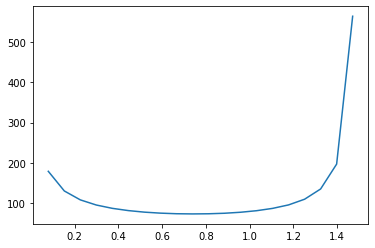

In [15]:
def alcance(v,theta):
    h = 0.01
    x0 = [0,0,v*np.cos(theta),v*np.sin(theta)]
    x = np.zeros( (1000000,len(x0) ),float)
    x[0] = np.copy(x0)
    i = -1
    t = 0
    y = 1.
    while y > 0.:
        i += 1
        k1 = np.copy(h*f(x[i],t))
        k2 = np.copy(h*f(x[i] + k1/2,t + h/2))
        k3 = np.copy(h*f(x[i] + k2/2,t + h/2)) 
        k4 = np.copy(h*f(x[i] + k3,t + h))
        x[i+1]= np.copy(x[i] + (k1 + 2*k2 + 2*k3 + k4)/6)
        y = x[i+1][1]
        t += h
    return x[i][0]
e = 1
theta = np.linspace(0.08,np.pi/2-0.1,20)
#theta = np.array([np.pi/4],float)
veloc = np.zeros(len(theta))
for i in range(len(theta)):
    v1 = 0.1
    v2 = 6000
    h1 = alcance(v1,theta[i])
    h2 = alcance(v2,theta[i])
    if (h1-400.)*(h2-400.) <0:
        while np.abs(h1-h2) > e:
            vp = (v1+v2)/2
            hp = alcance(vp,theta[i])
            if (hp-400.)*(h1-400.) > 0:
                v1 = vp
                h1 = hp
            else:
                v2 = vp
                h2 = hp
            print(vp)
        veloc[i] = (v1+v2)/2
p.plot(theta,veloc)
p.show()
